Load Data

In [1]:
import pandas as pd
import pickle

with open("../data/all_reviews.pkl","rb") as f:
    reviews = pickle.load(f)
    

,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful,industry,clean_job_title
0,Fluor Corp.,fun place to work,Principal Process Engineering Technician,Former Employee,"Sugar Land, TX",2020-02-03,"It is a 9 hour day, but if you are busy, it go...",NaN,NaN,5.0,0,0,construction,principal process engineering technician
1,Fluor Corp.,Im satisfied,Journeyman Pipefitter,Former Employee,"Crystal River, FL",2020-04-05,My boss are very understanding on the situatio...,NaN,NaN,5.0,0,0,construction,journeyman pipefitter
2,Fluor Corp.,New and intellectually stimulating work.,Systems Engineer and IT Specialist,Current Employee,"Aliso Viejo, CA",2020-04-05,Great place to work with great people. The ch...,NaN,NaN,5.0,0,0,construction,systems engineer and technology specialist
3,Fluor Corp.,For me.... GREAT group of people!,General Foreman - Crane and Rigging,Former Employee,"Deer Park, TX",2020-04-04,I have worked on numerous Fluor projects now. ...,Compensation was more than fair. People worked...,Time away from home.,5.0,0,0,construction,general foreman crane and rigging
4,Fluor Corp.,Good place to work in a Combat Zone,Security Specialist,Former Employee,Afghanistan,2020-04-04,I am very comfortable with the work schedule t...,NaN,NaN,5.0,0,0,construction,security specialist


Find Titles with common names

In [4]:
job_list=[
    "software developer"
    ,"web developer"
    ,"applications engineer"
    ,"system administrator"
    ,"computer programmer"
    ,"devops "
    ,"cloud"
    ,"database"
    ,"agile"
    ,"project"
    ,"system"
    ,"technology"
    ,"ios"
    ,"java"
    ,"data analytics"
    ,"data science"
]

#Split by word
job_keywords = []
for job in job_list:
    tokens = job.split(" ")
    job_keywords.extend(tokens)
    
job_keywords = list(set(job_keywords))

Find Jobs!

In [30]:
job_titles = reviews.clean_job_title.unique().tolist()

def findJobTItles(job):
    tokens = str(job).split(" ")
    tokens = set(tokens)
    return len( [ word for word in tokens if word in job_keywords ]) > 1

filter_titles = list( filter(findJobTItles, job_titles))

In [31]:
print("Jobs Found", len(filter_titles))
display("Sample Job Titles", filter_titles[:10])

Jobs Found 14878


'Sample Job Titles'

['systems engineer and technology specialist',
 'project engineer project management',
 'control system design engineer ii',
 'project administrator',
 'technology project manager',
 'project engineer',
 'project control specialist ii project controls ',
 'project execution and strategy leader pm iii ',
 'senior project engineer mining and metals',
 'Senior project cost engineer']

Let's do some EDA

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [83]:
embeddings = embed(filter_titles)

print(embeddings.shape)

(14878, 512)


In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=2500, random_state=76244)
tsne_values = tsne_model.fit_transform(embeddings)

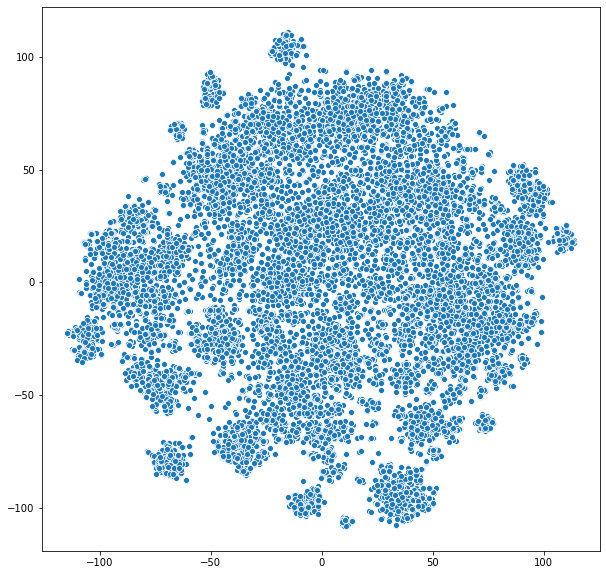

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = tsne_values[:,0],
    y = tsne_values[:,1]
)

Let's cluster this!

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,20)
dh = display("Start Cluster", display_id = True)
for k in K:
    dh.update("Running " + str(k))
    kmeans_model = KMeans(n_clusters=k, random_state=76244)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, "euclidean"), axis=1)) / X.shape[0])

'Running19'

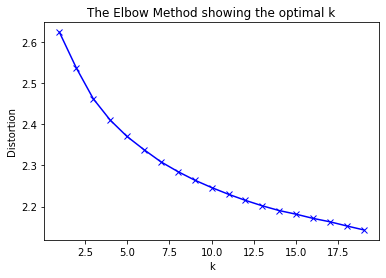

In [51]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [58]:
k=5
kmeans_model = KMeans(n_clusters=k, random_state=76244)
labels = kmeans_model.fit_predict(X)

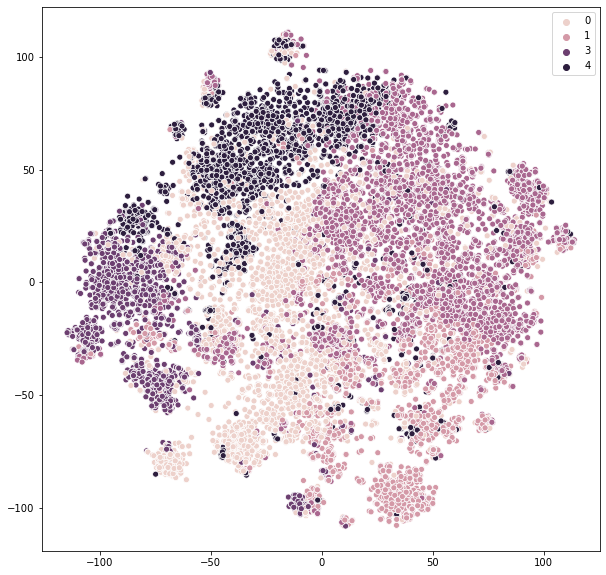

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = tsne_values[:,0],
    y = tsne_values[:,1],
    hue = labels
)

See some Examples

In [61]:
df = pd.DataFrame({"filter_titles":filter_titles,"label":labels})

df.head(100)

df.to_csv("../data/filter_titles.csv",index=False)

Let's exclude words

In [79]:
exlcude_keywords = [
    "camp"
    ,"tutor"
    ,"professor"
    ,"entry"
    ,"entries"
    ,"teacher"
    ,"audio"
    ,"civil"
    ,"facility"
    ,"facilities"
    ,"industrial"
    ,"metals"
    ,"project"
    ,"projects"    
]

def excludeJobTItles(job):
    tokens = str(job).split(" ")
    tokens = set(tokens)
    return len( [ word for word in tokens if word in exlcude_keywords ] ) == 0

filter_titles_2 = list( filter(excludeJobTItles, filter_titles) )
                       

In [80]:
len(filter_titles_2)

11594